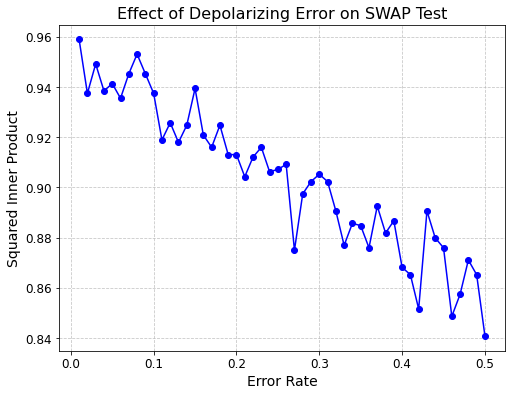

Gate Count:  7
     ┌─────────────────────────────┐                              
q_0: ┤ Initialize(0.54772,0.83666) ├────────────────────X─────────
     └┬────────────────────────────┤┌─────────────────┐ │         
q_1: ─┤ Initialize(0.7746,0.63246) ├┤ Quantum_channel ├─X─────────
      └───────────┬───┬────────────┘└─────────────────┘ │ ┌───┐┌─┐
q_2: ─────────────┤ H ├─────────────────────────────────■─┤ H ├┤M├
                  └───┘                                   └───┘└╥┘
c: 1/═══════════════════════════════════════════════════════════╩═
                                                                0 


In [103]:
#-------------------------Part 1--------------------------------#
    
import numpy as np
from math import*
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import depolarizing_error

#---------------------------------------------------------------#

# Define the two quantum states 
state1 = [sqrt(0.3), sqrt(0.7)]  #|A>
state2 = [sqrt(0.6), sqrt(0.4)]  #|B>

# Create a function to generate the SWAP test circuit with noise
def swap_test(error_rate):
    # Create a quantum circuit with three qubits
    circuit = QuantumCircuit(3, 1)
    
    # Encode the two states into qubits 0 and 1
    circuit.initialize(state1, 0)
    circuit.initialize(state2, 1)
    
    # Apply a depolarizing error to qubit 1
    error = depolarizing_error(error_rate, 1)
    circuit.append(error, [1])
    
    # Create an equal superposition on qubit 2
    circuit.h(2)
    
    # Apply SWAP test
    circuit.cswap(2, 0, 1)
    
    circuit.h(2)
    
    # Measure the third qubit
    circuit.measure(2, 0)
    
    return circuit

# Define a range of error rates and simulate the SWAP test for each rate
error_rates = np.linspace(0.01, 0.50, 50)  # Varying error rates

results = []

for error_rate in error_rates:
    circuit = swap_test(error_rate)
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Calculate the probability of measuring |0⟩
    if '0' in counts:
        prob_0 = counts['0'] / 1024
    else:
        prob_0 = 0
    
    results.append(prob_0)

# Plot the results to observe the effect of varying error rates on the SWAP test outcome
"""plt.plot(error_rates, results)
plt.xlabel('Error Rate')
plt.ylabel('Probability of Measuring |0⟩')
plt.title('Effect of Depolarizing Error on SWAP Test')
plt.grid(True)
plt.show()
print(circuit)"""

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(error_rates, results, marker='o', linestyle='-', color='b')
ax.set_xlabel('Error Rate', fontsize=14)
ax.set_ylabel('Squared Inner Product', fontsize=14)
ax.set_title('Effect of Depolarizing Error on SWAP Test', fontsize=16)
#ax.legend(fontsize=12)
ax.grid(True)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()
gate_count = circuit.size()
print("Gate Count: ", gate_count)
print(circuit)


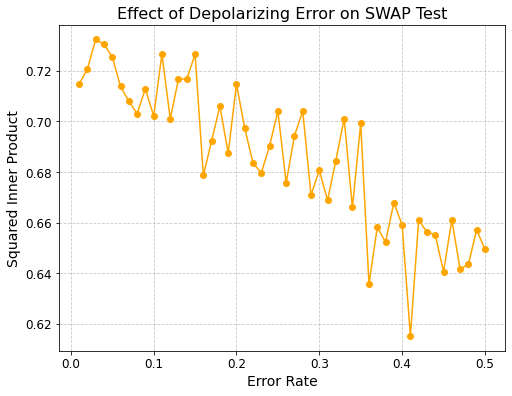

Gate Count:  11
     ┌─────────────────────────────────────────────┐                         »
q_0: ┤0                                            ├────────────────────X────»
     │  Initialize(0.31623,0.44721,0.7746,0.31623) │┌─────────────────┐ │    »
q_1: ┤1                                            ├┤ Quantum_channel ├─┼──X─»
     └──┬────────────────────────────────────────┬─┘└─────────────────┘ │  │ »
q_2: ───┤0                                       ├──────────────────────X──┼─»
        │  Initialize(0,0.70711,0.31623,0.63246) │                      │  │ »
q_3: ───┤1                                       ├──────────────────────┼──X─»
        └─────────────────┬───┬──────────────────┘                      │  │ »
q_4: ─────────────────────┤ H ├─────────────────────────────────────────■──┼─»
                          ├───┤                                            │ »
q_5: ─────────────────────┤ H ├────────────────────────────────────────────■─»
                          └───┘     

In [101]:
#-------------Part 2---------------------------#
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import depolarizing_error

#---------------------------------------------#

# Define the two quantum states 
state1 = [sqrt(0.1), sqrt(0.2), sqrt(0.6), sqrt(0.1)]  # |A⟩
state2 = [sqrt(0.0), sqrt(0.5), sqrt(0.1), sqrt(0.4)]  # |B⟩

# Create a function to generate the SWAP test circuit with noise
def swap_test(error_rate):
    # Create a quantum circuit with six qubits
    circuit = QuantumCircuit(6, 2)  
    

    circuit.initialize(state1, [0, 1])
    circuit.initialize(state2, [2, 3])
    
    # Apply a depolarizing error to qubit 1
    error = depolarizing_error(error_rate, 1)  # Modify to apply error only to qubit 1
    circuit.append(error, [1])
    

    circuit.h(4)
    circuit.h(5)
    
    # Apply SWAP test
    circuit.cswap(4, 0, 2)  # Modify qubit indices
    circuit.cswap(5, 1, 3)  # Modify qubit indices
    
    circuit.h(4)
    circuit.h(5)
    
    # Measure the ancilla qubits
    circuit.measure([4, 5], [0, 1])
    
    return circuit

# Define a range of error rates and simulate the SWAP test for each rate
error_rates = np.linspace(0.01, 0.50, 50)  

results = []

for error_rate in error_rates:
    circuit = swap_test(error_rate)
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Calculate the probability of measuring |0⟩
    if '00' in counts:
        prob_00 = counts['00'] / 1024
    else:
        prob_00 = 0
    
    results.append(prob_00)

# Plot the results to observe the effect of varying error rates on the SWAP test outcome
"""plt.plot(error_rates, results)
plt.xlabel('Error Rate')
plt.ylabel('Probability of Measuring |00⟩')
plt.title('Effect of Depolarizing Error on SWAP Test')
plt.grid(True)
plt.show()
print(circuit)"""

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(error_rates, results, marker='o', linestyle='-', color='orange')
ax.set_xlabel('Error Rate', fontsize=14)
ax.set_ylabel('Squared Inner Product', fontsize=14)
ax.set_title('Effect of Depolarizing Error on SWAP Test', fontsize=16)
#ax.legend(fontsize=12)
ax.grid(True)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()
gate_count = circuit.size()
print("Gate Count: ", gate_count)
print(circuit)


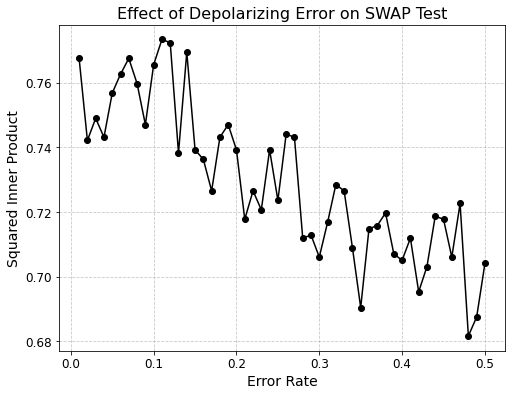

Gate Count:  15
           ┌────────────────────────────────────────────────────────────┐      »
q_0: ──────┤0                                                           ├──────»
           │                                                            │      »
q_1: ──────┤1 Initialize(0.1,0.31623,0.34641,0.36056,0.2,0,0.59161,0.5) ├──────»
           │                                                            │      »
q_2: ──────┤2                                                           ├──────»
     ┌─────┴────────────────────────────────────────────────────────────┴─────┐»
q_3: ┤0                                                                       ├»
     │                                                                        │»
q_4: ┤1 Initialize(0,0.44721,0.44721,0.31623,0.44721,0.22361,0.22361,0.44721) ├»
     │                                                                        │»
q_5: ┤2                                                                       ├»
     └──────

In [105]:
#----------------Part 3------------------------#
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import depolarizing_error
#----------------------------------------------#

# Define the two quantum states 
state1 = [sqrt(0.01), sqrt(0.10), sqrt(0.12), sqrt(0.13), sqrt(0.04), sqrt(0.0), sqrt(0.35), sqrt(0.25)]  # |A⟩
state2 = [sqrt(0.0), sqrt(0.2), sqrt(0.2), sqrt(0.1), sqrt(0.2), sqrt(0.05), sqrt(0.05), sqrt(0.2)]  # |B⟩

# Create a function to generate the SWAP test circuit with noise
def swap_test(error_rate):
    # Create a quantum circuit with nine qubits
    circuit = QuantumCircuit(9, 3)  
    
    circuit.initialize(state1, [0, 1, 2])
    circuit.initialize(state2, [3, 4, 5])
    
    # Apply a depolarizing error to qubit 1
    error = depolarizing_error(error_rate, 1)  
    circuit.append(error, [1])
    

    circuit.h(6)
    circuit.h(7)
    circuit.h(8)
    
    # Apply SWAP test
    circuit.cswap(6, 0, 3)  
    circuit.cswap(7, 1, 4)  
    circuit.cswap(8, 2, 5)  

    circuit.h(6)
    circuit.h(7)
    circuit.h(8)
    
    # Measure the ancilla qubits
    circuit.measure([6, 7, 8], [0, 1, 2])
    
    return circuit

# Define a range of error rates and simulate the SWAP test for each rate
error_rates = np.linspace(0.01, 0.50, 50) 

results = []

for error_rate in error_rates:
    circuit = swap_test(error_rate)
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Calculate the probability of measuring |000⟩
    if '000' in counts:
        prob_000 = counts['000'] / 1024
    else:
        prob_000 = 0
    
    results.append(prob_000)

# Plot the results to observe the effect of varying error rates on the SWAP test outcome
"""plt.plot(error_rates, results)
plt.xlabel('Error Rate')
plt.ylabel('Probability of Measuring |000⟩')
plt.title('Effect of Depolarizing Error on SWAP Test')
plt.grid(True)
plt.show()
print(circuit)"""
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(error_rates, results, marker='o', linestyle='-', color='black')
ax.set_xlabel('Error Rate', fontsize=14)
ax.set_ylabel('Squared Inner Product', fontsize=14)
ax.set_title('Effect of Depolarizing Error on SWAP Test', fontsize=16)
#ax.legend(fontsize=12)
ax.grid(True)
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()
gate_count = circuit.size()
print("Gate Count: ", gate_count)
print(circuit)